In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use("ggplot")
from matplotlib import figure
import psycopg2
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#connect to postgresql

# read the data
df = pd.read_csv('cel_export.csv', encoding='utf-8',on_bad_lines='skip')
df_copy = df.copy()
df_copy.head()




ModuleNotFoundError: No module named 'psycopg2'

In [3]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\nsama\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\nsama\anaconda3\python.exe -m pip install --upgrade pip' command.


# carte de chaleur des valeurs manquantes. jaunes : valeurs manquantes, bleu : valeurs non manquantes

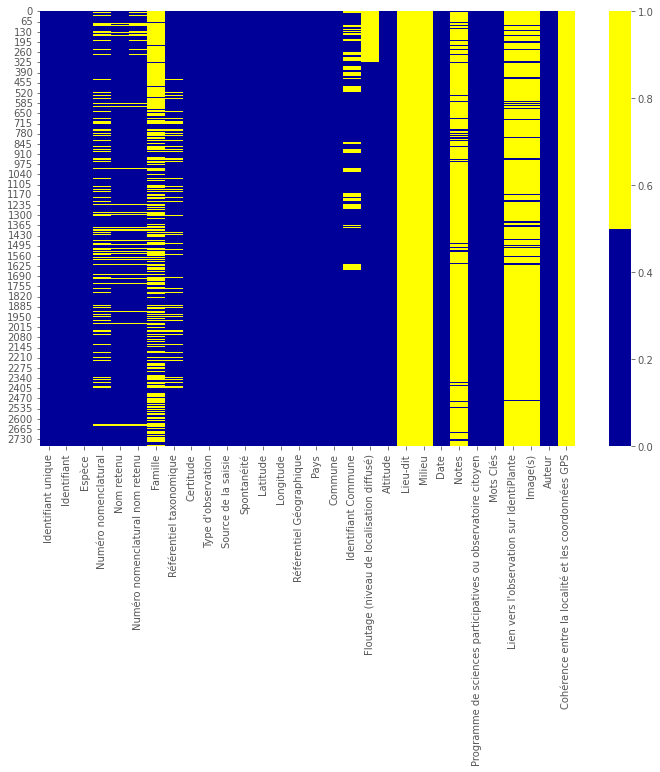

In [5]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

Identifiant unique - 0%
Identifiant - 0%
Espèce - 0%
Numéro nomenclatural - 21%
Nom retenu - 7%
Numéro nomenclatural nom retenu - 9%
Famille - 59%
Référentiel taxonomique - 11%
Certitude - 0%
Type d'observation - 0%
Source de la saisie - 0%
Spontanéité - 0%
Latitude - 0%
Longitude - 0%
Référentiel Géographique - 0%
Pays - 0%
Commune - 0%
Identifiant Commune - 14%
Floutage (niveau de localisation diffusé) - 12%
Altitude - 0%
Lieu-dit - 100%
Milieu - 100%
Date - 0%
Notes - 92%
Programme de sciences participatives ou observatoire citoyen - 0%
Mots Clés - 0%
Lien vers l'observation sur IdentiPlante - 91%
Image(s) - 91%
Auteur - 0%
Cohérence entre la localité et les coordonnées GPS - 100%
Précision de la localisation - 100%
Station - 100%
Indicateur de fiabilité - 0%
Détermination validée sur IdentiPlante - 0%
Score IdentiPlante - 45%
Abondance - 100%
Phénologie - 100%
Présence d'un échantillon d'herbier - 0%
Date Création - 0%
Date Modification - 0%
Transmis - 0%
Date Transmission - 0%
Obs

# Histogramme des valeurs manquantes 

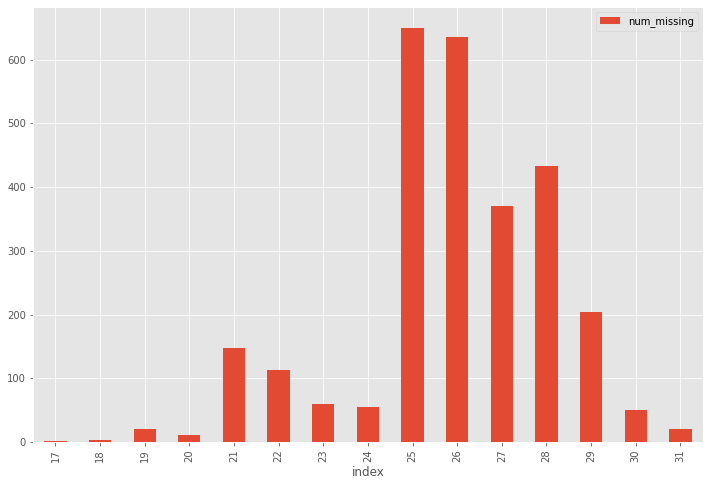

In [7]:
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
plt.show()